# **Customer Segmentation using Machine Learning Algorithms**

#### Overview
1. Import libraries
2. Load dataset
3. Explore & Clean the dataset 
4. Data preprocessing
5. Train model
6. Save Model

-----

### **<p style="color:  #4ceae5 ">Import Libraries</p>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

### **<p style="color:  #4ceae5 ">Load The Dataset</p>**

In [2]:
df = pd.read_excel('data/online_retail.xlsx')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


### **<p style="color:  #4ceae5 ">Explore & Clean The Dataset</p>**

##### Data General Description

In [3]:
# Check the data type of each column
df.info()

# Main description of the dataset
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,525461.0,525461,522533,525461.000000,525461,525461.000000,417534.000000,525461
unique,28816.0,4632,4681,NaN,25296,NaN,NaN,40
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,675.0,3516,3549,NaN,675,NaN,NaN,485852
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2010-12-09 20:01:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,10.337667,NaN,4.688834,15360.645478,NaN
std,NaN,NaN,NaN,107.424110,NaN,146.126914,1680.811316,NaN
min,NaN,NaN,NaN,-9600.000000,NaN,-53594.360000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13983.000000,NaN


In [4]:
# Number of unique value of each column
df.nunique()

Invoice        28816
StockCode       4632
Description     4681
Quantity         825
InvoiceDate    25296
Price           1606
Customer ID     4383
Country           40
dtype: int64

In [5]:
# number of NaN/NA/null value in each column 
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [6]:
# check the number of duplicated row
df.duplicated().sum()

6865

##### Data Manipulation

In [7]:
# fill NA/NaN/Null values      
# Note: it is not recommended to fill empty value with the previous value (backfill) in real life situation. You need to pay atention to the
# importance of those value first. Since this isn't real life situation and those empty value is less importance in this case, we can safely 
# use this backfill mehode to fill it.

df = df.fillna(method='backfill')
df.isna().sum().sum()

0

In [8]:
# drop duplicated rows
df = df.drop_duplicates()
df.duplicated().sum()

0

In [9]:
# change column dtype
df['Customer ID'] = df['Customer ID'].astype('int').astype(str) 
df['Customer ID'].dtype

dtype('O')

In [10]:
# check variable unique values
df['Country'].value_counts()

United Kingdom          479047
EIRE                      9660
Germany                   8120
France                    5754
Netherlands               2768
Spain                     1271
Switzerland               1187
Portugal                  1098
Belgium                   1053
Channel Islands            906
Sweden                     901
Italy                      729
Australia                  654
Cyprus                     546
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76
Israel  

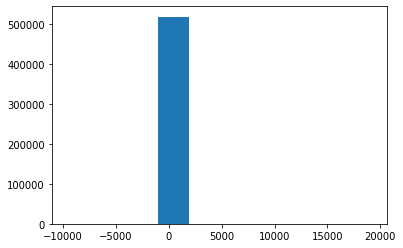

In [11]:
# check the distribution of quantity variable
plt.hist(df['Quantity'])
plt.show()

In [12]:
# remove values that below or equal zero
df = df[df['Quantity']>0]

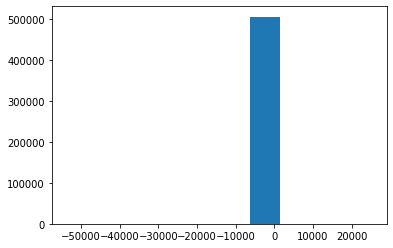

In [13]:
# check the distribution of price variable
plt.hist(df['Price'])
plt.show()

In [14]:
# remove values that below or equal zero
df = df[df['Price']>0]

In [15]:
# reset the dataframe's column order
df = df[['Customer ID', 'Country', 'Invoice', 'InvoiceDate', 'StockCode', 'Description', 'Quantity', 'Price']]
df

,Customer ID,Country,Invoice,InvoiceDate,StockCode,Description,Quantity,Price
0,13085,United Kingdom,489434,2009-12-01 07:45:00,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95
1,13085,United Kingdom,489434,2009-12-01 07:45:00,79323P,PINK CHERRY LIGHTS,12,6.75
2,13085,United Kingdom,489434,2009-12-01 07:45:00,79323W,WHITE CHERRY LIGHTS,12,6.75
3,13085,United Kingdom,489434,2009-12-01 07:45:00,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10
4,13085,United Kingdom,489434,2009-12-01 07:45:00,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25
...,...,...,...,...,...,...,...,...
525456,17530,United Kingdom,538171,2010-12-09 20:01:00,22271,FELTCRAFT DOLL ROSIE,2,2.95
525457,17530,United Kingdom,538171,2010-12-09 20:01:00,22750,FELTCRAFT PRINCESS LOLA DOLL,1,3.75
525458,17530,United Kingdom,538171,2010-12-09 20:01:00,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75
525459,17530,United Kingdom,538171,2010-12-09 20:01:00,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,3.75


In [16]:
# add total price column to dataframe
df['Total Price'] = df['Quantity'] * df['Price']

In [17]:
# add recency column to dataframe
# conver data type to date only, not timestamp
df['InvoiceDate'] = df['InvoiceDate'].dt.date
# subtract the most recent date + 1 to each date in the column in order to acquire number of days
df['Recency'] = (df['InvoiceDate'].max() + datetime.timedelta(days=1)) - df['InvoiceDate']
# turn number of days format to integer
df['Recency'] = df['Recency'].astype('timedelta64[D]').astype('int')

In [18]:
# create frequency dataframe
df_frequency = df[['Customer ID', 'InvoiceDate']].groupby(['Customer ID'], as_index=False).count().rename(columns={'InvoiceDate':'Shopping Frequency'})
df_frequency

,Customer ID,Shopping Frequency
0,12346,33
1,12347,71
2,12348,20
3,12349,103
4,12351,21
...,...,...
4309,18283,222
4310,18284,28
4311,18285,12
4312,18286,67


In [19]:
# create monetery dataframe
df_monetery = df[['Customer ID', 'Total Price']].groupby(['Customer ID'], as_index=False).sum().rename(columns={'Total Price':'Total Spending'})
df_monetery

,Customer ID,Total Spending
0,12346,372.86
1,12347,1323.32
2,12348,222.16
3,12349,2696.67
4,12351,300.93
...,...,...
4309,18283,639.92
4310,18284,461.68
4311,18285,427.00
4312,18286,1296.43


In [20]:
# create recency dataframe
df_recency = df[['Customer ID', 'Recency']].groupby(['Customer ID'], as_index=False).min()
df_recency

,Customer ID,Recency
0,12346,165
1,12347,3
2,12348,74
3,12349,43
4,12351,11
...,...,...
4309,18283,18
4310,18284,67
4311,18285,296
4312,18286,112


In [21]:
# merge all of 3 dataframe to create fresh and clean new dataframe
df_cleaned = df_recency.merge(df_frequency.merge(df_monetery, on='Customer ID'), on='Customer ID')
df_cleaned

,Customer ID,Recency,Shopping Frequency,Total Spending
0,12346,165,33,372.86
1,12347,3,71,1323.32
2,12348,74,20,222.16
3,12349,43,103,2696.67
4,12351,11,21,300.93
...,...,...,...,...
4309,18283,18,222,639.92
4310,18284,67,28,461.68
4311,18285,296,12,427.00
4312,18286,112,67,1296.43


##### Data Visualization

In [22]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x=df_cleaned['Recency'], 
                                   y=df_cleaned['Shopping Frequency'], 
                                   z=df_cleaned['Total Spending'],
                                   mode='markers',
                                   marker=dict(
                                                size=4,
                                                opacity=0.8
    ))])

fig.update_layout(
                    scene = dict(xaxis = dict(title='Recency',),
                                 yaxis = dict(title='Shopping Frequency',),
                                 zaxis = dict(title='Total Spending',),),
                    width=500, height=600,
                    margin=dict(l=3, r=3, b=3, t=3, pad=5))
fig.show()


### **<p style="color:  #4ceae5 ">Data Preprocessing</p>**

##### Transform Data

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(df_cleaned.drop('Customer ID', axis=1))
scaled = scaler.transform(df_cleaned.drop('Customer ID', axis=1))

df_transformed = pd.DataFrame(scaled, columns=df_cleaned.drop('Customer ID', axis=1).columns)
df_transformed

,Recency,Shopping Frequency,Total Spending
0,0.439678,0.004614,0.001034
1,0.005362,0.010092,0.003692
2,0.195710,0.002739,0.000613
3,0.112601,0.014706,0.007532
4,0.026810,0.002884,0.000833
...,...,...,...
4309,0.045576,0.031863,0.001781
4310,0.176944,0.003893,0.001283
4311,0.790885,0.001586,0.001186
4312,0.297587,0.009516,0.003617


### **<p style="color:  #4ceae5 ">Train The Model</p>**

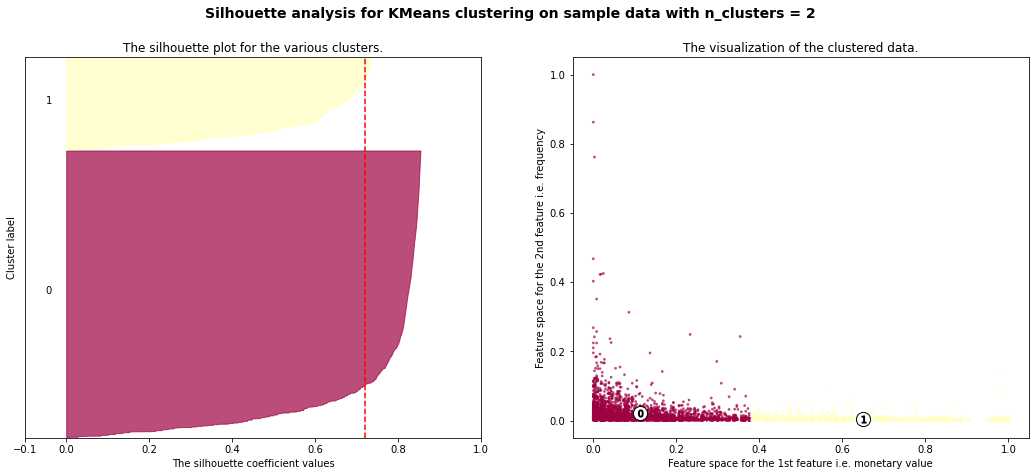

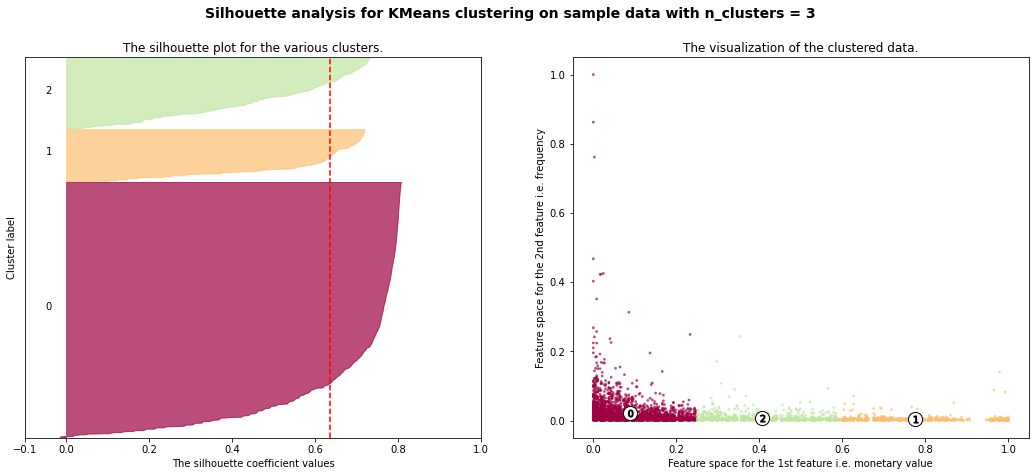

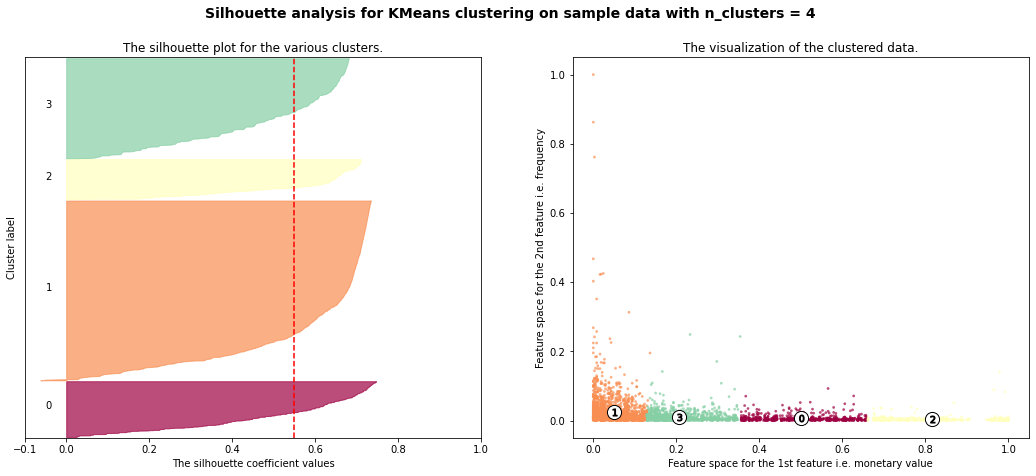

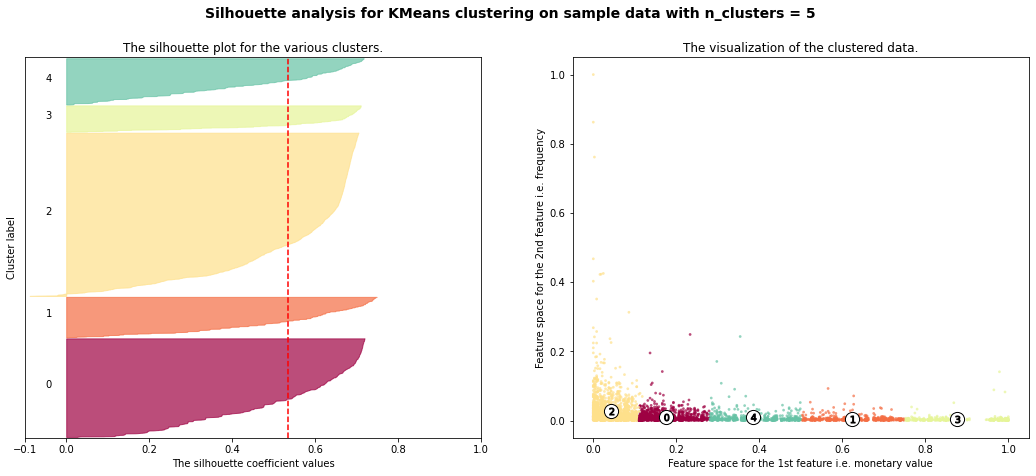

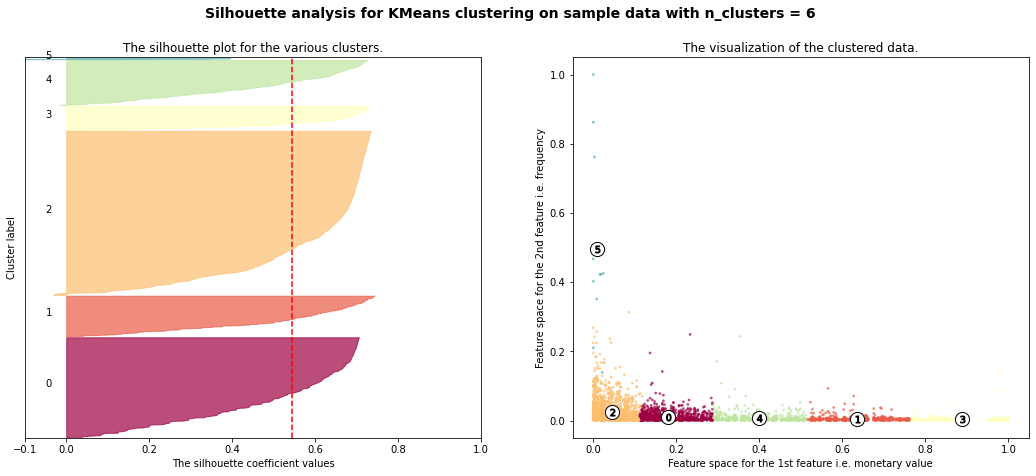

In [24]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X = df_transformed.values

cluster_centers = dict()

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.get_cmap("Spectral")(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.get_cmap("Spectral")(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 1
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. monetary value")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. frequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [25]:
# kmeans inertia value
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
wcss

[299.94251514528713,
 70.25445119725235,
 39.75328861083385,
 25.785202322162192,
 19.41318520292817,
 15.652556288829135,
 12.209736615516299,
 10.344257073089349,
 8.922718327046478]

Text(0, 0.5, 'WCSS')

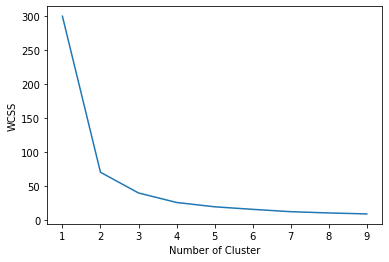

In [26]:
# visualize elbow method to decide number of cluster
plt.figure()
plt.plot(range(1,10), wcss)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')

In [27]:
# train dataset again with choosen number of cluster
clusterer = KMeans(n_clusters=3, random_state=10)
cluster = clusterer.fit(df_transformed.values)
cluster_labels = cluster.predict(df_transformed.values)
cluster_labels

array([2, 0, 0, ..., 1, 2, 0])

In [28]:
# add number of cluster variable into dataframe
df_transformed['clusters'] = cluster_labels
df_transformed

,Recency,Shopping Frequency,Total Spending,clusters
0,0.439678,0.004614,0.001034,2
1,0.005362,0.010092,0.003692,0
2,0.195710,0.002739,0.000613,0
3,0.112601,0.014706,0.007532,0
4,0.026810,0.002884,0.000833,0
...,...,...,...,...
4309,0.045576,0.031863,0.001781,0
4310,0.176944,0.003893,0.001283,0
4311,0.790885,0.001586,0.001186,1
4312,0.297587,0.009516,0.003617,2


In [29]:
# visualize clustered dataframe
fig = go.Figure(data=[go.Scatter3d(x=df_transformed['Recency'], 
                                   y=df_transformed['Shopping Frequency'], 
                                   z=df_transformed['Total Spending'],
                                   mode='markers',
                                   marker=dict(
                                                size=4,
                                                color=df_transformed['clusters'],
                                                colorscale=['#187c9f', '#55189f', '#2a9f18'],
                                                opacity=0.8
    ))])

fig.update_layout(
                    scene = dict(xaxis = dict(title='Recency',),
                                 yaxis = dict(title='Shopping Frequency',),
                                 zaxis = dict(title='Total Spending',),),
                    width=700, height=800,
                    margin=dict(l=3, r=3, b=3, t=3, pad=5))
fig.show()

In [30]:
data = {
        'Customer ID': '12346',
        'Recency': 165,
        'Shopping Frequency': 33,
        'Total Spending': 372.86
}

df_new = pd.DataFrame([data])
df_new

,Customer ID,Recency,Shopping Frequency,Total Spending
0,12346,165,33,372.86


In [31]:
df_new_transformed = scaler.transform(df_new.drop('Customer ID', axis=1))
df_new_transformed

array([[0.43967828, 0.00461361, 0.00103426]])

In [32]:
cluster.predict(df_new_transformed)

array([2])

### **<p style="color:  #4ceae5 ">Save The Model</p>**

In [ ]:
import pickle

pickle.dump(cluster, open("Models/customer_cluster.pkl", "wb"))
